In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Loan_data.csv')

In [5]:
df.shape

(9578, 14)

In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In [11]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [12]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [19]:
df=df.rename(columns={'not.fully.paid':'default'})

In [20]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [26]:
X=df.drop('default',axis=1)
y=df['default']

In [27]:
cat_col=X.select_dtypes(include='O').columns

In [72]:
cat_col=list(cat_col)

In [73]:
cat_col

['purpose']

In [30]:
num_col=X.select_dtypes(exclude='O').columns

In [31]:
num_col=list(num_col)

In [32]:
num_col

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec']

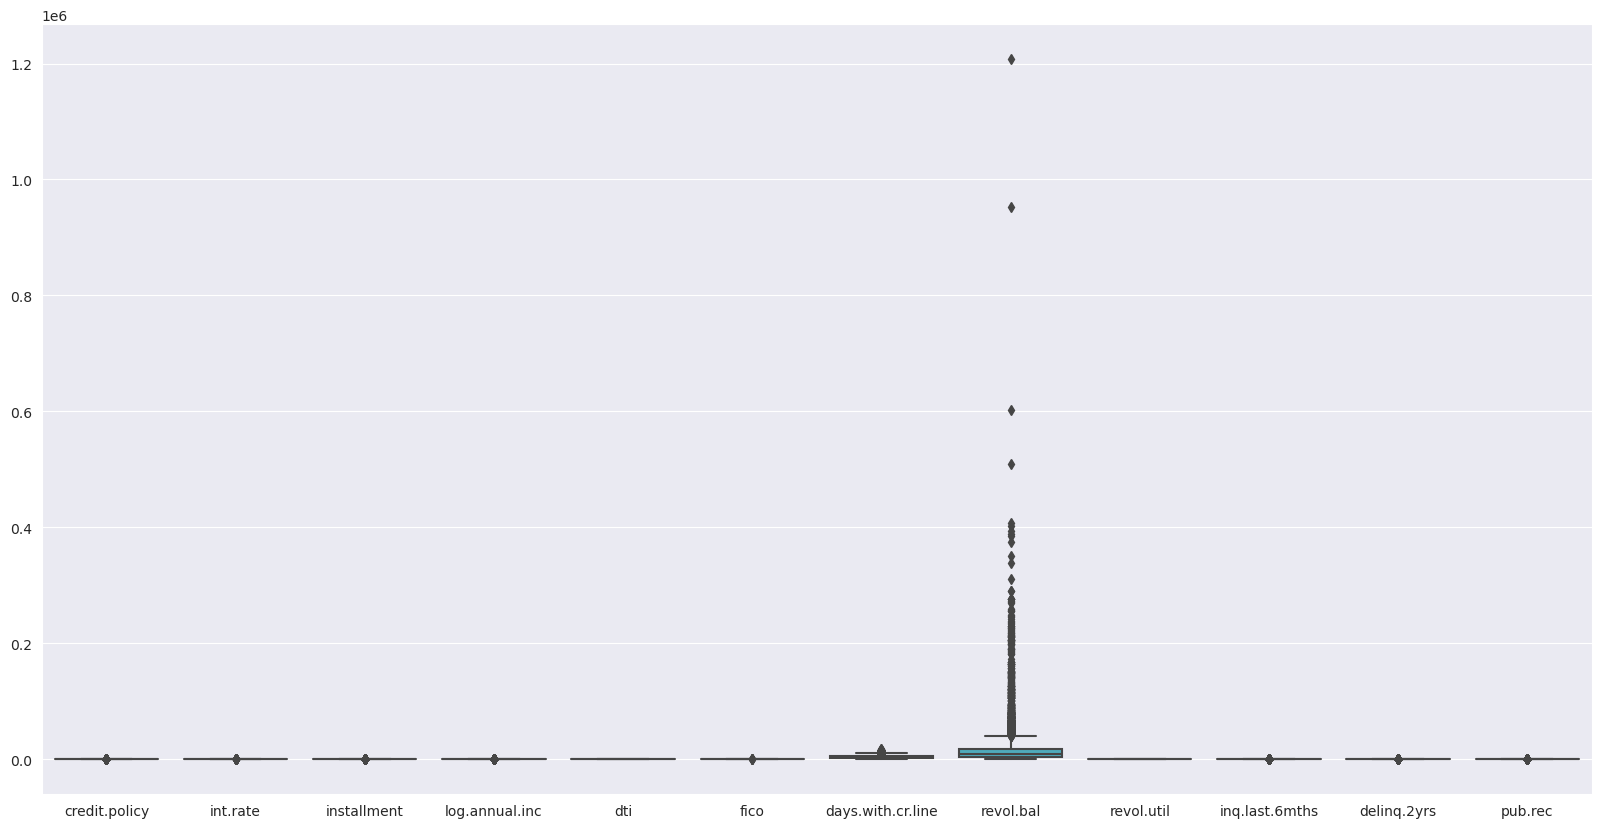

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X)
plt.show()

In [41]:
num_col_greater_10=[]
num_col_smaller_10=[]
for col in num_col:
    if X[col].nunique()<10:
        num_col_smaller_10.append(col)
    else:
        num_col_greater_10.append(col)

In [42]:
num_col_greater_10

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs']

In [43]:
num_col_smaller_10

['credit.policy', 'pub.rec']

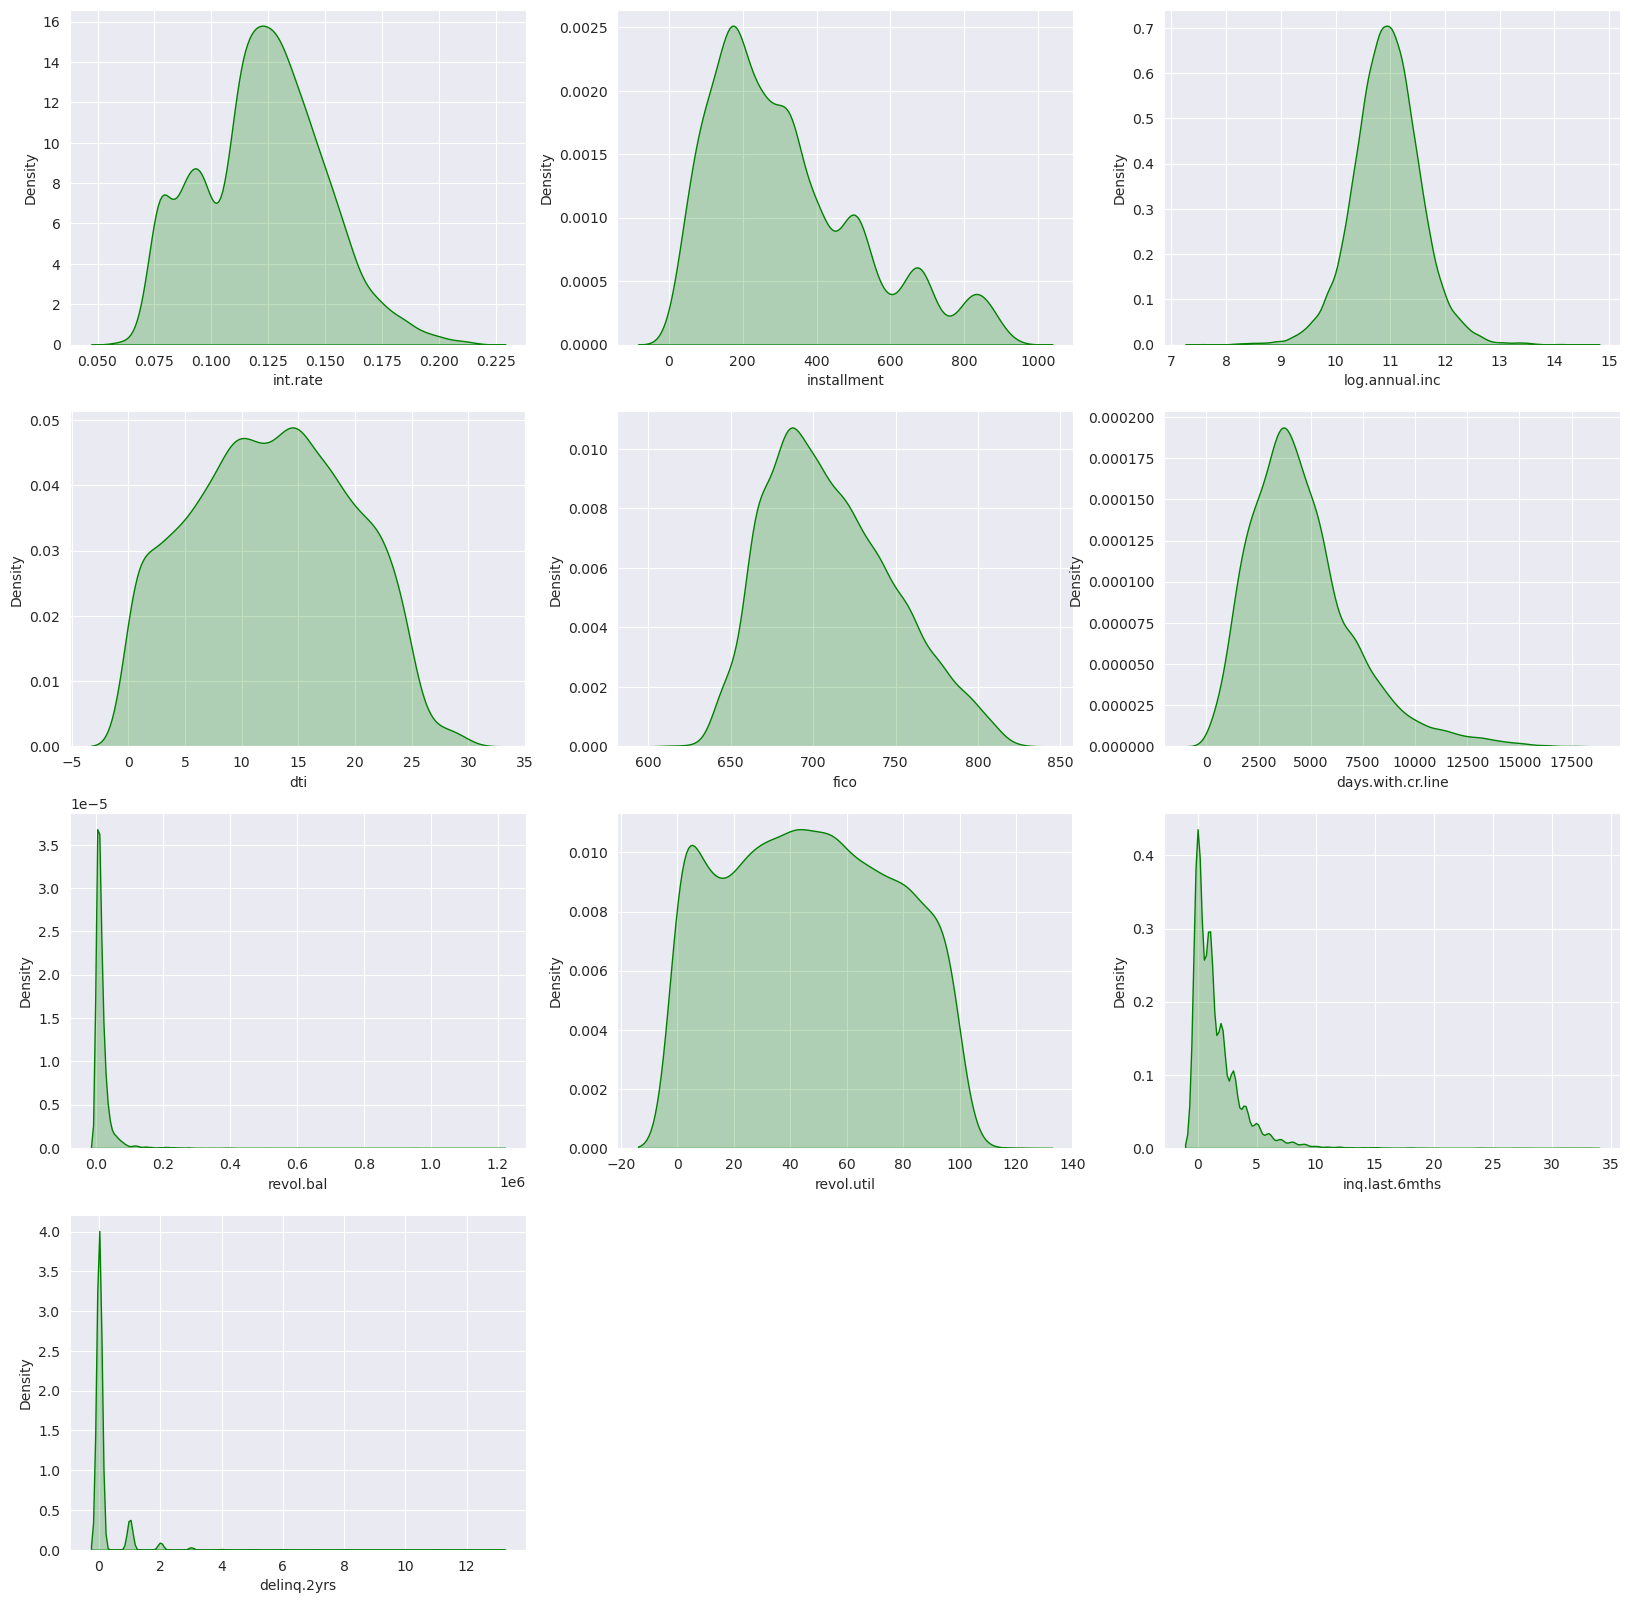

In [46]:
plt.figure(figsize=(20,20))
i=1
for col in num_col_greater_10:
    plt.subplot(4,3,i)
    sns.kdeplot(X[col],fill=True,color='green')
    i=i+1    

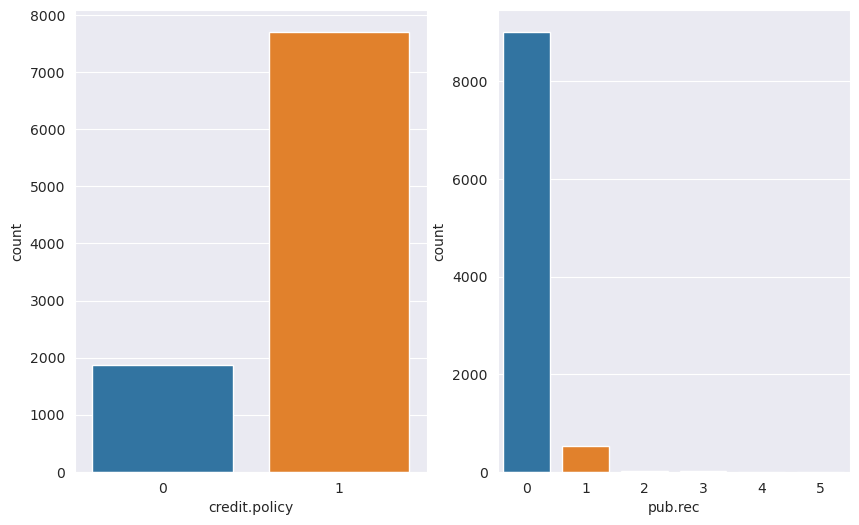

In [50]:
plt.figure(figsize=(10,6))
i=1
for col in num_col_smaller_10:
    plt.subplot(1,2,i)
    sns.countplot(x=X[col])
    i=i+1

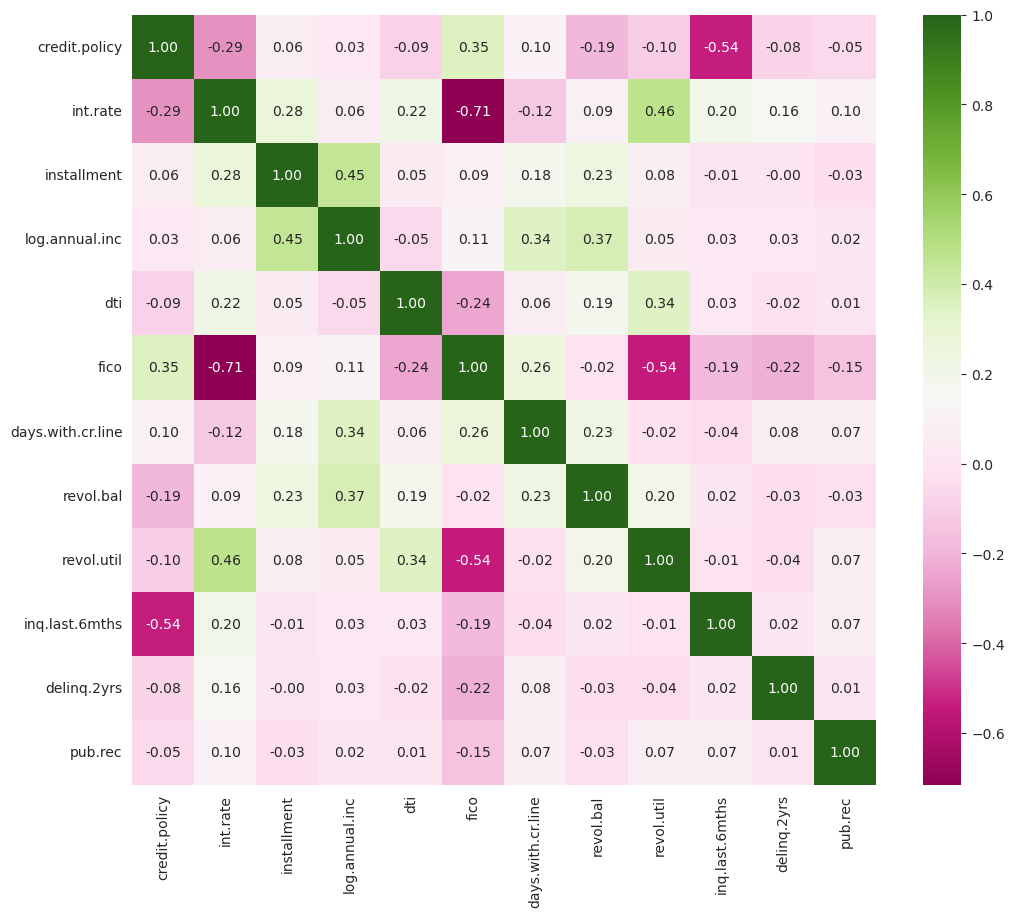

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(),annot=True,cmap='PiYG',fmt='.2f')
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
num_pipeline=Pipeline(steps=
                      [('imputer',SimpleImputer(strategy='median')),
                       ('scaler',StandardScaler())])
cat_pipeline=Pipeline(steps=
                      [('imputer',SimpleImputer(strategy='most_frequent')),
                       ('Encoder',OneHotEncoder(sparse=False)),
                       ('scaler',StandardScaler())])


In [90]:
preprocessor=ColumnTransformer([
    ('numerical pipeline',num_pipeline,num_col),
    ('categorical pipeline',cat_pipeline,cat_col)])

In [97]:
models={"Logistic Regression":LogisticRegression(),
        "Decision Tree":DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier(),
        "Ada boost":AdaBoostClassifier(),
        "KNN":KNeighborsClassifier(),
        "SVM":SVC()}

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=21)

In [99]:
X_train

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
9466,0,all_other,0.1287,622.22,11.260611,18.24,737,7560.041667,116601,89.6,2,0,0
5334,1,home_improvement,0.1218,807.53,11.156251,10.29,787,4656.958333,1026,14.5,0,0,0
9043,0,small_business,0.1505,329.57,11.695247,7.30,672,3150.000000,3951,16.5,4,0,0
1807,1,all_other,0.1347,254.42,10.373616,21.30,692,2252.041667,14629,93.8,1,0,0
2718,1,debt_consolidation,0.1284,84.05,10.668955,8.76,687,5670.000000,1580,14.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,0,educational,0.0859,237.08,10.968198,24.66,752,10350.000000,152002,51.6,3,0,0
48,1,credit_card,0.0901,159.03,11.198215,9.96,722,3089.958333,23489,37.6,0,0,0
8964,0,all_other,0.1537,69.70,9.998798,3.22,702,1050.041667,2503,27.5,0,0,0
5944,1,small_business,0.1670,275.14,10.165852,19.52,697,1650.041667,10634,71.5,0,0,0


In [100]:
X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled=preprocessor.transform(X_test)

In [101]:
report={}
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    score=accuracy_score(y_test,y_pred)
    report[list(models.keys())[i]]=score

In [102]:
report

{'Logistic Regression': 0.8235908141962421,
 'Decision Tree': 0.7515657620041754,
 'Random Forest': 0.8288100208768268,
 'Ada boost': 0.824634655532359,
 'KNN': 0.8131524008350731,
 'SVM': 0.826722338204593}

In [105]:
best_score=max(report.values())

In [109]:
best_score

0.8288100208768268

In [108]:
list(report.keys())[list(report.values()).index(best_score)]

'Random Forest'

In [113]:
cm=confusion_matrix(y_test,y_pred)

In [114]:
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[1581    4]
 [ 328    3]]


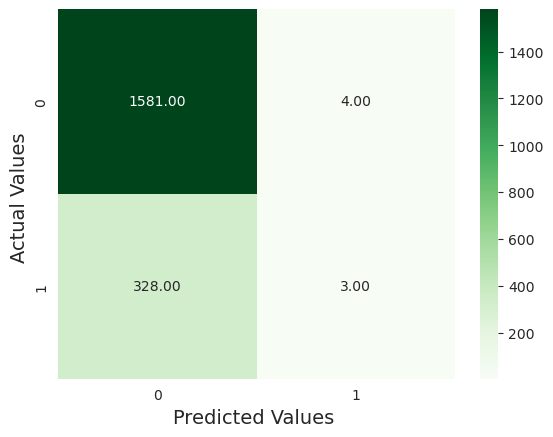

In [121]:
sns.heatmap(cm,annot=True,cmap='Greens',fmt='.2f')
plt.xlabel("Predicted Values ",size=14)
plt.ylabel("Actual Values ",size=14)
plt.show()

In [128]:
y_test.value_counts()

0    1585
1     331
Name: default, dtype: int64

In [126]:
y_train.value_counts(normalize=True)*100

0    84.31219
1    15.68781
Name: default, dtype: float64

In [129]:
RF=RandomForestClassifier()

In [130]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [132]:
y_rf=RF.predict(X_test_scaled)

In [133]:
accuracy_score(y_test,y_rf)

0.8277661795407099

In [134]:
confusion_matrix(y_test,y_rf)

array([[1578,    7],
       [ 323,    8]])